# FEATURE ENGINEERING AND LOGISTIC REGRESSION

In [ ]:
# In this assignment, you will perform feature engineering and logistic regression on Titanic dataset,
# where you will create new columns, transform variables into numerical values, and handle missing values!
# This is done to find whether the passenger had survived or not.
# Our main aim here is to find the accuracy score of our model.

# Link to Titanic dataset: 
# https://raw.githubusercontent.com/Shreyas3108/Titanic-EDA-and-Survival-prediction/master/train.csv 
# https://raw.githubusercontent.com/Shreyas3108/Titanic-EDA-and-Survival-prediction/master/test.csv


# Perform the following: 

# 1) Import the required libraries (sklearn, pandas, numpy). Import datasets. Concatenate the datasets. Display first 5 rows.

# 2) Remove NaN values from the column ‘Survived’.
#    (Hint: use .dropna())

# 3) Create a new column 'Has_Cabin' that tells you whether passengers had a cabin or not.
#    (Hint: use .isnull() method in “Cabin” column)

# 4) Create a new column “Title”, which will contain the titles of the passengers such as Mr., Mrs., etc.
#    There should be five titles: Mr, Mrs, Master, Miss, and Special. 
#    (Hint: Use regular expression to replace the titles)

# 5) Impute the missing values using .fillna() method.

# 6) Create two new columns “Categorical_age” and “Categorical_fare”,
#    where you will put people that are within a certain range of age or fare in the same bin. 
#    You can do this by using the pandas function qcut() to bin your numerical data.
#    (This is done because there is a range of ages and fares,
#    so there might be fluctuations in those numbers that don't reflect patterns in the data, which might be noise.)
#    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html)

# 7) Drop columns Cabin, Name, Passengerid, Ticket, Age, Fare, SibSp, Parch.

# 8) Transform all variables into numeric ones using get_dummies().

# 9) Now we need training set and testing set. Use train_test_split() to split your dataset. 
#    X(Features) will be the dataset values without the column “Survived” and y(Targets) will be your “Survived” column values.

# 10) Use logistic regression by passing your X_train and y_train.

# 11) Print the accuracy score.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/Titanic-EDA-and-Survival-prediction/master/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/Titanic-EDA-and-Survival-prediction/master/test.csv")

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [7]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
final = pd.concat([train, test])
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


C:\Users\intel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [10]:
# Age has 177 missing values
# Cabin has 687 missing values

In [11]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [12]:
final.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [13]:
final.dropna(subset=['Survived'], inplace=True)
final.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
886,27.0,NaN,S,13.00,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536
887,19.0,B42,S,30.00,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053
888,NaN,NaN,S,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607
889,26.0,C148,C,30.00,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369
890,32.0,NaN,Q,7.75,"Dooley, Mr. Patrick",0,891,3,male,0,0.0,370376


In [14]:
# Append a new column which tells that if a passenger has cabin or not

final['Has_cabin'] = final['Cabin'].notnull().astype(int)

In [15]:
# Adding a column in dataset which will contain Title of every passenger name

def add_title(name):
    pat_1 = re.compile(r'Mr')
    pat_2 = re.compile(r'Mrs')
    pat_3 = re.compile(r'Miss')
    pat_4 = re.compile(r'Master')
    for i in range(0, 891):
        str = name[i].split(',')
        if(pat_2.search(str[1])):
            name[i] = 'Mrs'
        elif(pat_1.search(str[1])):
            name[i] = 'Mr'
        elif(pat_3.search(str[1])):
            name[i] = 'Miss'
        elif(pat_4.search(str[1])):
            name[i] = 'Master'
        else:
            name[i] = 'Special'
        
        
final['Title'] = final['Name']
np.apply_along_axis(add_title, 0, final['Title'])    

array(None, dtype=object)

In [16]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_cabin,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr


In [17]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
Has_cabin      891 non-null int32
Title          891 non-null object
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 100.9+ KB


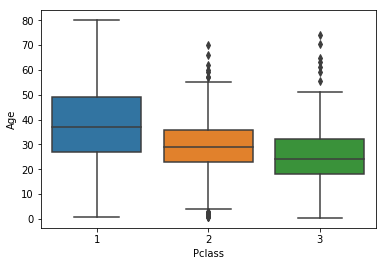

In [18]:
sns.boxplot(x='Pclass', y='Age', data=final)

In [19]:
final['Title'].value_counts()

Mr         518
Miss       180
Mrs        129
Master      40
Special     24
Name: Title, dtype: int64

In [20]:
final['Age'] = final['Age'].fillna(final['Age'].mean())
final['Embarked'] = final['Embarked'].fillna('S')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
Age            891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
Has_cabin      891 non-null int32
Title          891 non-null object
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 140.9+ KB


In [21]:
final.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Has_cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.228956
std,13.002015,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,0.420397
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,29.699118,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,0.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,1.000000


In [22]:
final['Categorical_Age'] = pd.qcut(final['Age'], 4, labels=['A', 'B', 'C', 'D'])
final['Categorical_Age'].value_counts()

B    330
A    231
D    217
C    113
Name: Categorical_Age, dtype: int64

In [23]:
final['Categorical_Fare'] = pd.qcut(final['Fare'], 5, labels=['LC', 'LM', 'M', 'UM', 'U'])
final['Categorical_Fare'].value_counts()

LM    184
UM    180
LC    179
U     176
M     172
Name: Categorical_Fare, dtype: int64

In [24]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_cabin,Title,Categorical_Age,Categorical_Fare
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr,A,LC
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,D,U
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,B,LM
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,C,U
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,C,LM


In [25]:
final = final.drop(labels=['Cabin', 'Name', 'Parch', 'PassengerId', 'Ticket', 'Age', 'Fare', 'SibSp'], axis=1)
final.head()

,Embarked,Pclass,Sex,Survived,Has_cabin,Title,Categorical_Age,Categorical_Fare
0,S,3,male,0.0,0,Mr,A,LC
1,C,1,female,1.0,1,Mrs,D,U
2,S,3,female,1.0,0,Miss,B,LM
3,S,1,female,1.0,1,Mrs,C,U
4,S,3,male,0.0,0,Mr,C,LM


In [26]:
final = pd.get_dummies(final, columns=['Sex'], drop_first=True)
final = pd.get_dummies(final, columns=['Title'], drop_first=True)
final = pd.get_dummies(final, columns=['Categorical_Fare'], drop_first=True)
final = pd.get_dummies(final, columns=['Embarked'], drop_first=True)
final = pd.get_dummies(final, columns=['Categorical_Age'], drop_first=True)

final.head()

,Pclass,Survived,Has_cabin,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Categorical_Fare_LM,Categorical_Fare_M,Categorical_Fare_UM,Categorical_Fare_U,Embarked_Q,Embarked_S,Categorical_Age_B,Categorical_Age_C,Categorical_Age_D
0,3,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,1.0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,1,1.0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,3,0.0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [27]:
final.shape

(891, 17)

In [28]:
final['Survived'] = final.Survived.apply(lambda x: int(x))
final.head()

,Pclass,Survived,Has_cabin,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Categorical_Fare_LM,Categorical_Fare_M,Categorical_Fare_UM,Categorical_Fare_U,Embarked_Q,Embarked_S,Categorical_Age_B,Categorical_Age_C,Categorical_Age_D
0,3,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [29]:
y = final['Survived']
x = final
x.drop(labels=['Survived'], axis=1, inplace=True)

In [30]:
x.shape

(891, 16)

In [31]:
y.shape

(891,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 16)
(712,)
(179, 16)
(179,)


In [35]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
print(score)

0.8100558659217877
